In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'QzpcVXNlcnNcVXNlclxEb2N1bWVudHNcR2l0SHViXHByaW1lbnVtYmVyc2FtLmdpdGh1Yi5pb1x0aGVzaXM='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\importlib\\_bootstrap.py": 1738654656.0, "C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\importlib\\_bootstrap_external.py": 1738654656.0, "C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\zipimport.py": 1738654656.0, "C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\codecs.py": 1738654656.0, "C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\encodings\\aliases.py": 1738654656.0, "C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\encodings\\__init__.py": 1738654656.0, "C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\encodings\\utf_8.py": 1738654656.0, "C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\encodings\\cp949.py": 1738654656.0, "C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\abc.py": 1738654656.0, "C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\i

In [2]:
import pandas as pd
import pandas_datareader.data as pdr
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define time period
start_date = "1996-01-01"
end_date = "2024-12-31"

# Fetch Fama-French ME_Breakpoints data (NYSE percentile breakpoints)
breakpoints_raw = pdr.DataReader(
    name="ME_Breakpoints",
    data_source="famafrench",
    start=start_date,
    end=end_date
)[0]

# Extract percentile labels from column names (e.g., "(0, 5)" -> "5")
def extract_upper_bound(label):
    if isinstance(label, str) and "(" in label:
        try:
            return str(int(label.split(",")[1].replace(")", "").strip()))
        except Exception:
            return label
    elif isinstance(label, tuple):
        return str(label[1])
    return str(label)

# Rename columns to only use upper percentile values
columns_to_rename = {col: extract_upper_bound(col) for col in breakpoints_raw.columns if col != 'Count'}
breakpoints = breakpoints_raw.rename(columns=columns_to_rename)

# Normalize ME values by number of firms (Count) to get "per firm" values
for col in breakpoints.columns:
    if col != 'Count':
        breakpoints[col] = breakpoints[col] / breakpoints['Count']

# Print average firm count over the period
avg_count = int(breakpoints['Count'].mean())
print(f"Average number of NYSE firms from {start_date} to {end_date}: {avg_count}")

Average number of NYSE firms from 1996-01-01 to 2024-12-31: 1386


In [3]:
# Plot selected percentile breakpoints over time
selected_percentiles = ['80', '85', '90', '95', '100']
breakpoints[selected_percentiles].plot(figsize=(10, 5))

plt.legend(title='Percentile')
plt.ylabel('Market Equity (in millions) per firm')
plt.title('NYSE ME Breakpoints (Per Firm Basis)')
plt.tight_layout()
plt.show()

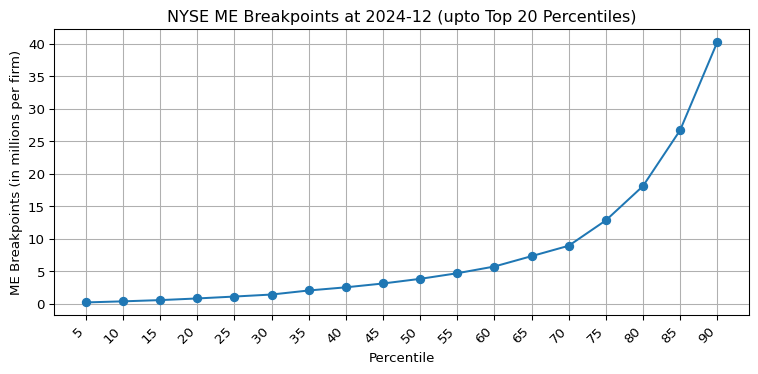

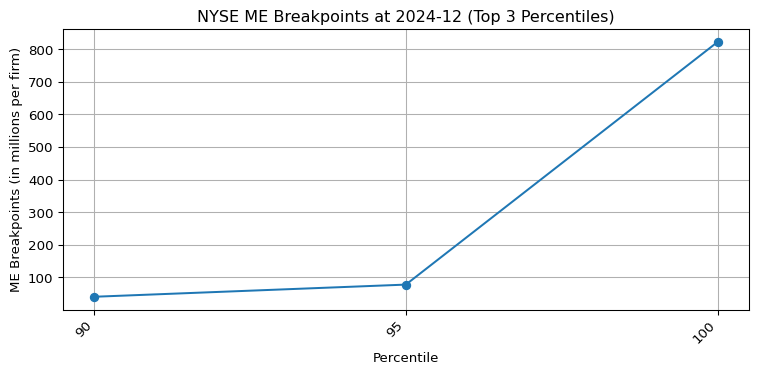

In [4]:
def plot_breakpoints_at_end(df, count_col='Count', start_pct=0, end_pct=None, title_suffix=''):
    """
    Plot breakpoints at the last available date.
    
    Parameters:
        df: DataFrame with percentile columns and 'Count'
        count_col: name of the column representing number of firms (default: 'Count')
        start_pct: starting index for column slice (e.g., -20 for top 20 percentiles)
        end_pct: ending index for column slice (default: None means till the end)
        title_suffix: string appended to plot title
    """
    # Select data at last date
    last_row = df.tail(1).drop(columns=[count_col])
    
    # Slice desired percentile columns
    selected_columns = last_row.columns[start_pct:end_pct]
    y_data = pd.to_numeric(last_row[selected_columns].values.flatten(), errors='coerce')
    
    # Plot
    plt.figure(figsize=(8, 4))
    plt.plot(selected_columns, y_data, marker='o')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Percentile')
    plt.ylabel('ME Breakpoints (in millions per firm)')
    plt.title(f'NYSE ME Breakpoints at {df.index[-1]} {title_suffix}')
    plt.tight_layout()
    plt.grid(True)
    plt.show()

# 전체 percentile 구간 시각화
plot_breakpoints_at_end(breakpoints, start_pct=0, title_suffix='(Full Range)')

# 상위 3개 빼고 시각화 (5~90)
plot_breakpoints_at_end(breakpoints, start_pct=-20, end_pct=-2, title_suffix='(upto Top 20 Percentiles)')

# 가장 극단적인 상위 3개만 (90, 95, 100 만)
plot_breakpoints_at_end(breakpoints, start_pct=-3, title_suffix='(Top 3 Percentiles)')

In [5]:
# Calculate the ME per firm ratio: 100th / 95th percentile
ratio_series = breakpoints['100'] / breakpoints['95']

# Convert PeriodIndex to DatetimeIndex for plotting
ratio_series.index = ratio_series.index.to_timestamp()

# Plot both raw and log-transformed ratio
plt.figure(figsize=(12, 5))

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.tick_params(axis='x', rotation=45) # x축 눈금 회전 추가

# Raw ratio
plt.plot(ratio_series.index, ratio_series, marker='o')
plt.title('ME per Firm Ratio: 100th / 95th Percentile')
plt.xlabel('Date')
plt.ylabel('Ratio (ME[100] / ME[95])')
plt.grid(True)

plt.tight_layout()
plt.show()

In [6]:
# Calculate the ME per firm ratio: 95th / 50th percentile
ratio_series = breakpoints['95'] / breakpoints['50']

# Convert PeriodIndex to DatetimeIndex for plotting
ratio_series.index = ratio_series.index.to_timestamp()

# Plot both raw and log-transformed ratio
plt.figure(figsize=(12, 5))

# Raw ratio
plt.plot(ratio_series.index, ratio_series, marker='o')
plt.title('ME per Firm Ratio: 95th / 50th Percentile')
plt.xlabel('Date')
plt.ylabel('Ratio (ME[95] / ME[50])')
plt.grid(True)

plt.tight_layout()
plt.show()